# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

<function matplotlib.pyplot.show(*args, **kw)>

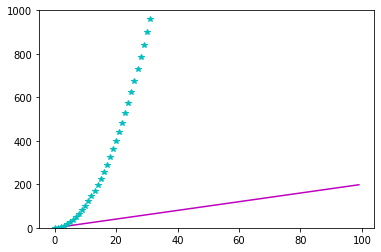

In [20]:
# Method 1
plt.plot(x,y, 'm-')
plt.plot(x,z, 'c*')
plt.ylim(0, 1000) 
plt.show

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

Text(0.5, 1.0, 'z = x**2')

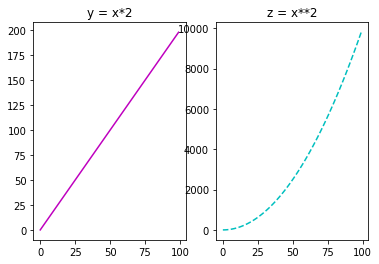

In [34]:
# Method 2
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(x, y, 'm-')
ax1.set_title('y = x*2')
ax2.plot(x,z, 'c--')
ax2.set_title('z = x**2')

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

Text(0.5, 1.0, 'z = x**2')

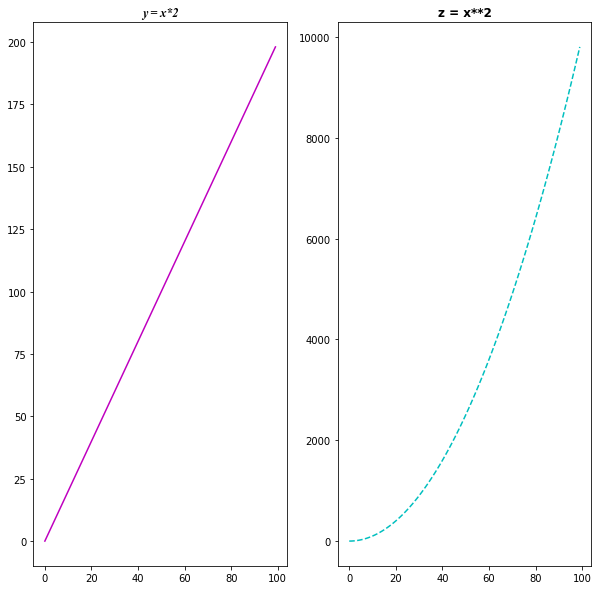

In [41]:
# your code here

from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')
font.set_style('italic')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10,10))
ax1.plot(x, y, 'm-')
ax1.set_title('y = x*2', fontproperties=font, fontsize='large')
ax2.plot(x,z, 'c--')
ax2.set_title('z = x**2', fontsize='large', fontweight='bold')



#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

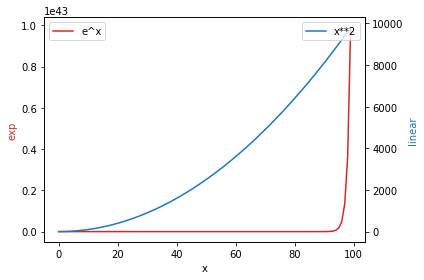

In [87]:
x = np.arange(0,100)
z = x**2
w = np.exp(x)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('x')
ax1.set_ylabel('exp', color=color)
ax1.plot(x, w, color=color, label= 'e^x')
ax1.legend(loc=0)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('linear', color=color)
ax2.plot(x, z, color=color, label= 'x**2')
ax2.legend(loc=1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()




#### As a bonus challenge, try to add a legend to the plot.

In [ ]:
# already put legend above, however couldn't put it in the same box 

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [89]:
# your code here

fitbit = pd.read_csv('Fitbit2.csv')

fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [126]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

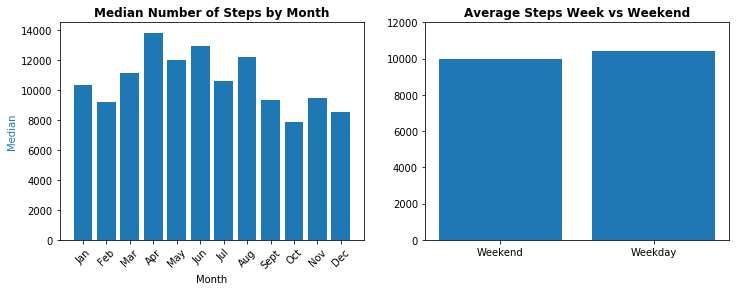

In [124]:
# MEDIAN STEPS BY MONTH_ENCODED

steps_month = fitbit.groupby('Months_encoded')['Steps'].median()
steps_month

f, (steps1, steps2) = plt.subplots(1, 2, sharey=False, figsize=(12,4))
#Bar Chart
fig1= steps1.bar(steps_month.index,steps_month.values)
#Title 
steps1.set_title('Median Number of Steps by Month' , fontweight='bold')
# Setting x label
steps1.set_xlabel('Month')
#Setting y label
steps1.set_ylabel('Median', color=color)

steps1.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
steps1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], rotation=45)

# MEDIAN STEPS BY WORK_OR_WEEKEND

steps_work_weekend = fitbit.groupby('Work_or_Weekend')['Steps'].median()
steps2.bar([0,1], steps_work_weekend.values)
steps2.set_title('Average Steps Week vs Weekend' , fontweight='bold')

steps2.set_xticks([0,1])
steps2.set_xticklabels(['Weekend','Weekday'])
steps2.set_ylim([0,12000])


plt.savefig('plots.png')

In [125]:
steps_work_weekend

Work_or_Weekend
0     9998.0
1    10445.5
Name: Steps, dtype: float64

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

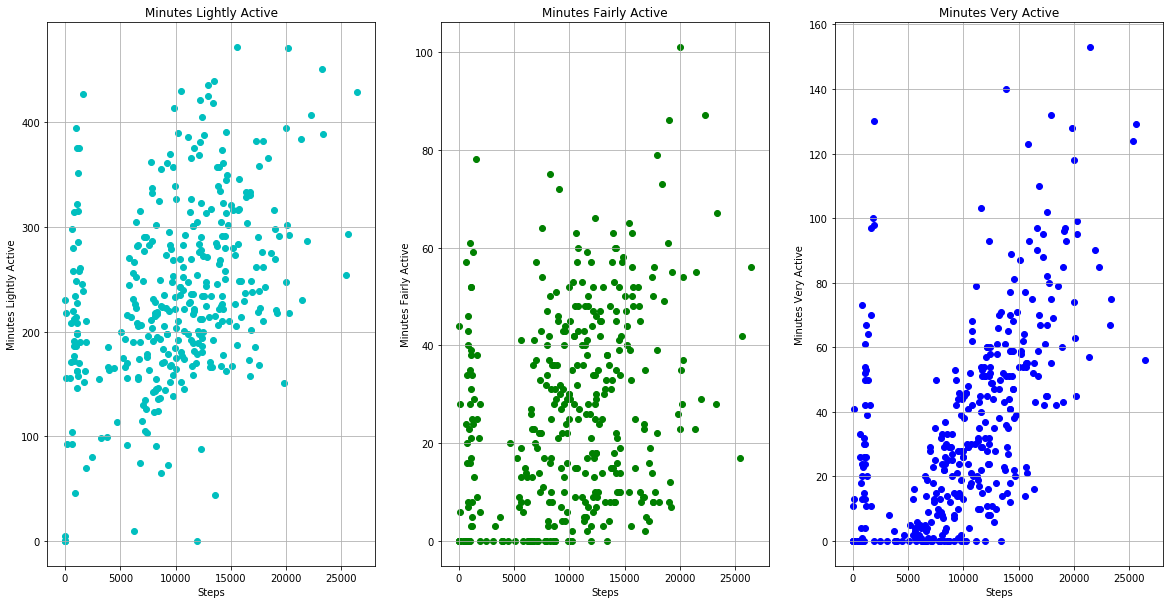

In [167]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20,10))

titles = ['Minutes Lightly Active', 'Minutes Fairly Active','Minutes Very Active']
y_vals = [fitbit['Minutes Lightly Active'], fitbit['Minutes Fairly Active'], fitbit['Minutes Very Active']]
colors = ['c', 'g', 'b']

for ax, title, y, color in zip(axes.flat, titles, y_vals, colors):
    ax.scatter(fitbit['Steps'], y, c= color)
    ax.set_title(title)
    ax.set_ylabel(title)
    ax.set_xlabel('Steps')
    ax.grid(True)

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [150]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [151]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [197]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1309.0,29.879186,13.448335,0.17,22.0000,28.5000,37.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1309.0,33.281086,51.741500,0.00,7.8958,14.4542,31.275,512.3292


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [154]:
# NUMERICAL VARIABLES
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_variables = titanic.select_dtypes(include=numerics)

list(num_variables.columns.values) 

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [156]:
# CATEGORICAL VARIABLES
categ_variables = titanic.select_dtypes(include=object)
list(categ_variables.columns.values) 

['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked']

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [ ]:
# your code here



#### Use the right visulalization to show the distribution of column `Age`.

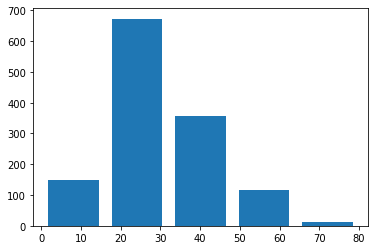

In [166]:
plt.hist(titanic['Age'], bins = 5,rwidth=0.8 )
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

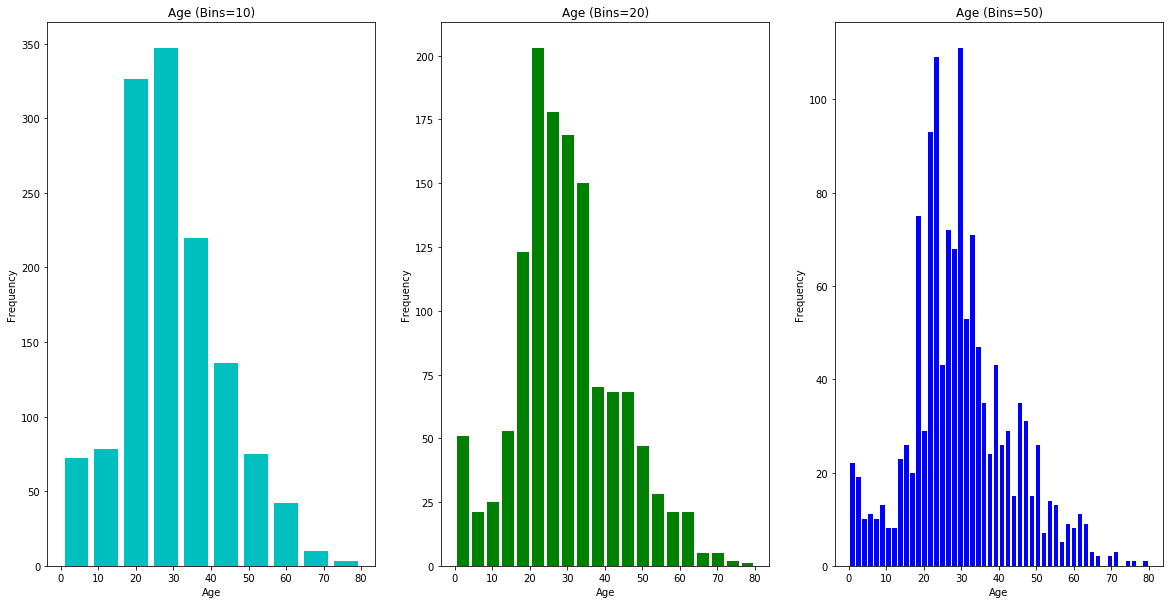

In [172]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20,10))

titles = ['Age (Bins=10)', 'Age (Bins=20)','Age (Bins=50)']
colors = ['c', 'g', 'b']
bins = [10,20,50]

for ax, title, color, abin in zip(axes.flat, titles, colors, bins):
    ax.hist(titanic['Age'], bins = abin ,rwidth=0.8, color= color)
    ax.set_title(title)
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Age')

#### How does the bin size affect your plot?

In [ ]:
"""
The larger the bin sizes, the fewer bins there will be to cover the whole range of data. 
With a smaller bin size, the more bins there will need to be. 
If you have too many bins, then the data distribution will look rough, and it will be difficult to discern the signal from the noise. 
On the other hand, with too few bins, the histogram will lack the details needed to discern any useful pattern from the data.
"""

#### Use seaborn to show the distribution of column `Age`.

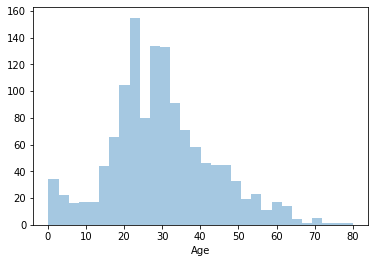

In [177]:
sns.distplot(titanic['Age'], kde= False)
plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

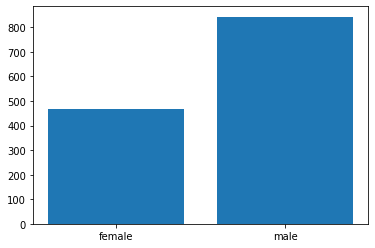

In [187]:
# Method 1 - matplotlib
gender1 = titanic.groupby('Gender')['Gender'].count()
gender1

plt.bar(gender1.index,gender1.values)
plt.show()

In [194]:
gender1

Gender
female    466
male      843
Name: Gender, dtype: int64

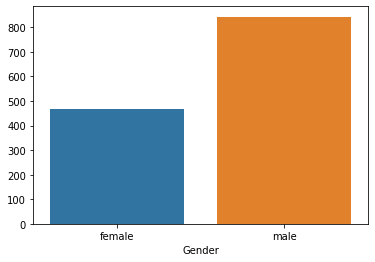

In [195]:
# Method 2 - seaborn

ax = sns.barplot(x=gender1.index, y=gender1.values)

#### Use the right plot to visualize the column `Pclass`.

In [200]:
titanic['Pclass'].unique()

array([3, 1, 2], dtype=int64)

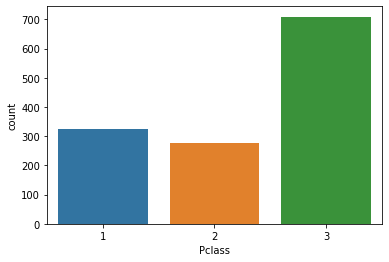

In [204]:
ax2 = sns.countplot(x="Pclass", data=titanic)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

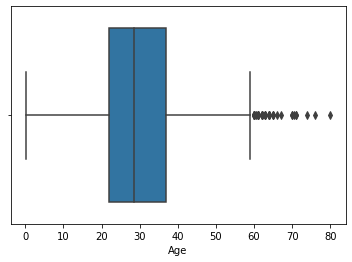

In [209]:
# your code here

ages_stats = sns.boxplot(x=titanic["Age"])

In [ ]:
"""
A boxplot is a standardized way of displaying the distribution of data based on a five number summary:
(“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). 
It can tell you about your outliers and what their values are.
It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
The median age is 28 years.  
50% of the ages of the passengers are between 22 years old and 37 years old.
95% of the ages fall between 0.17 and 59.5 years old.
"""

In [214]:
titanic.quantile([0.25,0.5,0.75]).T

,0.25,0.50,0.75
PassengerId,328.0000,655.0000,982.000
Survived,0.0000,0.0000,1.000
Pclass,2.0000,3.0000,3.000
Age,22.0000,28.5000,37.000
SibSp,0.0000,0.0000,1.000
Parch,0.0000,0.0000,0.000
Fare,7.8958,14.4542,31.275


#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

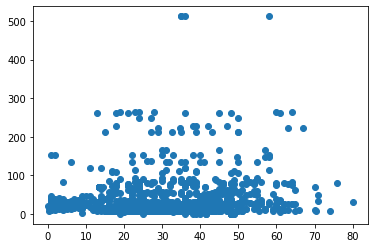

In [217]:
# Method 1 - matplotlib
plt.scatter(x= titanic['Age'], y= titanic['Fare'])
plt.show()

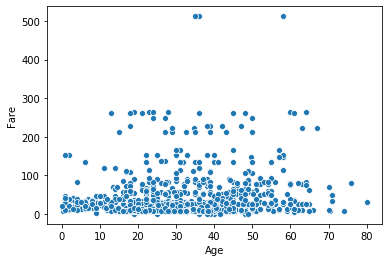

In [218]:
# Method 2 - seaborn
sns.scatterplot(x='Age', y= 'Fare', data = titanic)

#### Plot the correlation matrix using seaborn.

In [223]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


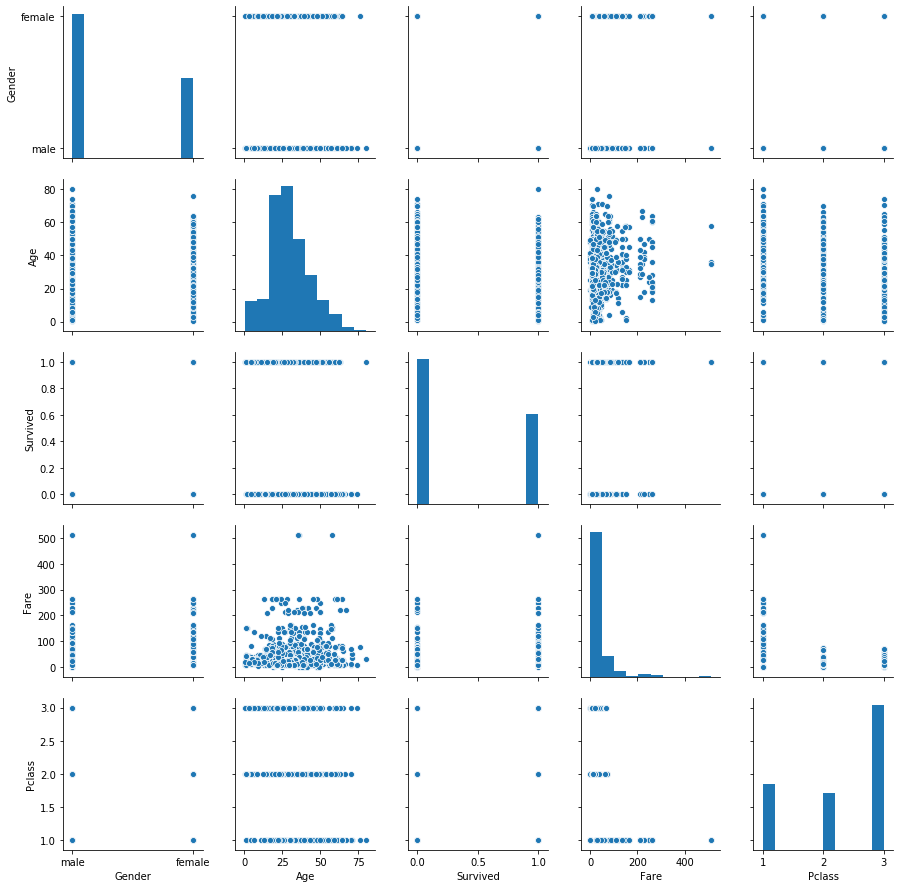

In [227]:
sns.pairplot(titanic, vars=["Gender", "Age", "Survived", "Fare", "Pclass"])
#Left out variables as passengerid, name, ticket


#### What are the most correlated features?

In [ ]:
#sibsp Number of Siblings/Spouses Aboard
#parch Number of Parents/Children Aboard
"""
Fare and Pclass (Ticket Class)

"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

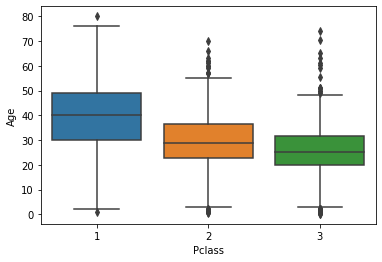

In [239]:
sns.boxplot(x="Pclass", y="Age", data= titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

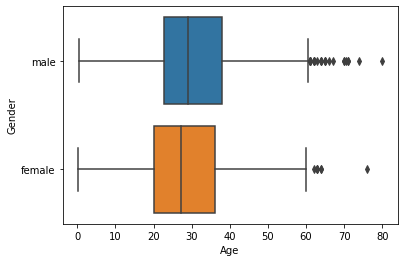

In [237]:
# your code here
sns.boxplot(x="Age", y="Gender", data= titanic)